In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r"C:\Users\91638\Downloads\GOOGL.csv",na_values="None")

In [3]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
...,...,...,...,...,...,...,...
4426,2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
4427,2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
4428,2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
4429,2022-03-23,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700


In [4]:
data1=data['Close']
data1

0         50.220219
1         54.209209
2         54.754753
3         52.487488
4         53.053055
           ...     
4426    2722.510010
4427    2722.030029
4428    2797.360107
4429    2765.510010
4430    2831.439941
Name: Close, Length: 4431, dtype: float64

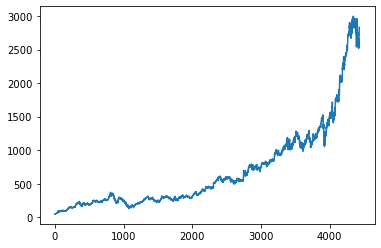

In [5]:
import matplotlib.pyplot as plt
plt.plot(data1)

In [6]:
import numpy as np

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data1=scaler.fit_transform(np.array(data1).reshape(-1,1))

In [8]:
data1

array([[5.60505519e-05],
       [1.40975800e-03],
       [1.59489433e-03],
       ...,
       [9.32328062e-01],
       [9.21519383e-01],
       [9.43893427e-01]])

In [9]:
data1.ndim

2

In [10]:
training_size=int(len(data1)*0.65)
test_size=len(data1)-training_size
train_data,test_data=data1[0:training_size,:],data1[training_size:len(data1),:1]

In [11]:
training_size,test_size

(2880, 1551)

In [12]:
train_data

array([[5.60505519e-05],
       [1.40975800e-03],
       [1.59489433e-03],
       ...,
       [2.31975250e-01],
       [2.32032936e-01],
       [2.26531908e-01]])

In [13]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [14]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [15]:
print(X_train.shape), print(y_train.shape)

(2779, 100)
(2779,)


(None, None)

In [16]:
print(X_test.shape), print(ytest.shape)

(1450, 100)
(1450,)


(None, None)

In [17]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [18]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [19]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=3,batch_size=64,verbose=1)

Epoch 1/3
44/44 [==============================] - 9s 135ms/step - loss: 0.0012 - val_loss: 0.0019
Epoch 2/3
44/44 [==============================] - 5s 106ms/step - loss: 4.7394e-05 - val_loss: 0.0023
Epoch 3/3
44/44 [==============================] - 5s 108ms/step - loss: 3.7395e-05 - val_loss: 0.0018


In [22]:
import tensorflow as tf

In [23]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [24]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [25]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

359.77518759695636

In [26]:
math.sqrt(mean_squared_error(ytest,test_predict))

1479.2277046004306

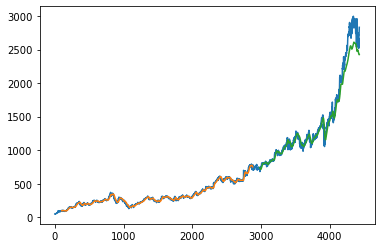

In [27]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(data1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(data1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [28]:
len(test_data)

1551

In [29]:
x_input=test_data[1451:].reshape(1,-1)
x_input.shape

(1, 100)

In [30]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [31]:
temp_input

[0.956958823481945,
 0.9700954727495689,
 0.9780059965935639,
 0.9893373053170964,
 0.9933044148390155,
 0.9945193535220263,
 0.9937557913770747,
 0.9732244537017088,
 0.9723624636452197,
 0.9921234455087096,
 0.9905895272125209,
 0.9866800825825106,
 0.9878406702333218,
 1.0,
 0.9938100592658408,
 0.9759970062201122,
 0.97246760275897,
 0.9747616858576066,
 0.9480404077874425,
 0.9707606897870554,
 0.9461026699791092,
 0.9403607091192273,
 0.9533548532566145,
 0.9468085672321521,
 0.9546376478409617,
 0.982563591119997,
 0.9887875005281388,
 0.9850681180542793,
 0.9875318816295717,
 0.9727696801605071,
 0.9597415670097763,
 0.9769404395117868,
 0.9633930939216603,
 0.94493189131887,
 0.9441309631574321,
 0.9567925400084318,
 0.9767639653682064,
 0.9801677655713917,
 0.9868870462715802,
 0.9786100689319266,
 0.97839291457279,
 0.9753080936434215,
 0.9661555385740691,
 0.9671023688688863,
 0.9630843053179103,
 0.9181223760072353,
 0.9179357108542272,
 0.9129776938187919,
 0.924193507150

In [46]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<100):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.92385754 0.89441798 0.90285793 0.91020506 0.91787125 0.88258451
 0.86808702 0.86408594 0.84898098 0.88361618 0.89561933 0.89967468
 0.89291803 0.8963795  0.89181851 0.87829154 0.84077186 0.84569938
 0.888564   0.88184133 0.86447277 0.8378703  0.85990838 0.88761726
 0.89140789 0.90692686 0.90676397 0.93232806 0.92151938 0.94389343
 0.80757433 0.80854315 0.80894196 0.80861568 0.80754161 0.80577737
 0.80342233 0.80059195 0.79740083 0.79395199 0.79033393 0.78661871
 0.78286231 0.77910626 0.77538073 0.77170664 0.76809686 0.76455963
 0.76109844 0.75771451 0.75440711 0.75117427 0.74801356 0.74492234
 0.74189752 0.73893666 0.7360366  0.7331956  0.73041064 0.72768027
 0.72500217 0.72237474 0.71979636 0.71726537 0.71478057 0.71234035
 0.70994377 0.70758927 0.70527595 0.70300269 0.70076829 0.69857174
 0.69641215 0.69428861 0.69219989 0.69014549 0.6881243  0.68613571
 0.68417865 0.68225247 0.68035662 0.6784898  0.67665207 0.67484242
 0.67305988 0.67130429 0.66957468 0.66787076 0.666

In [47]:
day_new=np.arange(1,101)
day_pred=np.arange(101,201)

In [48]:
import matplotlib.pyplot as plt


In [49]:
len(data1)

4431

Text(0, 0.5, 'Google Stock Price')

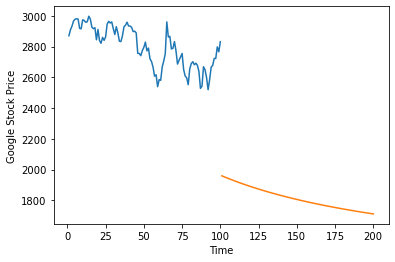

In [50]:
plt.plot(day_new,scaler.inverse_transform(data1[4331:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.xlabel('Time')
plt.ylabel('Google Stock Price')